# Data Analyze

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
churn = pd.read_csv('churn.csv')
commentInteractions = pd.read_csv('commentInteractions.csv')
votes = pd.read_csv('votes.csv')
comments_clean_anonimized = pd.read_csv('comments_clean_anonimized.csv')

/home/osboxes/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3155: DtypeWarning: Columns (2,3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


# 1.4 Last participation date of employees

## The lastParticipationExists.csv file contains information about the date of the last interaction of an employee with the app.

    employee: An integer id that identifies an amployee inside a company. (negative = not in the company anymore)
    companyAlias: A hash id for a given company that uses the app. An employee can be uniquely identified with the tuple (employee,companyAlias).
    numVotes: Total number of happyness votes emited by the user.
    lastParticipationDate: Date of the last interaction of the user with the app.
    stillExists: Boolean that is True if the user is still registered in the app.

In [3]:
churn

,employee,companyAlias,numVotes,lastParticipationDate,stillExists
0,512,56aec740f1ef260003e307d6,4,Thu Feb 23 12:48:04 CET 2017,True
1,-2,56aec740f1ef260003e307d6,0,Wed Jan 18 14:00:55 CET 2017,False
2,2,56aec740f1ef260003e307d6,72,Fri Mar 17 01:00:00 CET 2017,True
3,487,56aec740f1ef260003e307d6,14,Sat Nov 19 15:02:14 CET 2016,False
4,3,56aec740f1ef260003e307d6,22,Thu Feb 16 01:00:00 CET 2017,True
...,...,...,...,...,...
4842,857,58a728a0e75bda00042a3468,1,Fri Mar 17 15:43:58 CET 2017,True
4843,858,58a728a0e75bda00042a3468,1,Fri Mar 17 17:00:00 CET 2017,True
4844,859,58a728a0e75bda00042a3468,1,Fri Mar 17 17:01:54 CET 2017,True
4845,17,573a0671b5ec330003add34a,7,Tue Jun 28 02:00:00 CEST 2016,True


In [56]:
churn.lastParticipationDate = pd.to_datetime(churn.lastParticipationDate)
#pd.to_datetime(churn.lastParticipationDate).apply(lambda x: x.toordinal())

In [70]:
churn_2016 = churn[(churn['lastParticipationDate'] >= '2016-01-01') & (churn['lastParticipationDate'] < '2017-01-01')]

In [61]:
churn.lastParticipationDate.describe()

<ipython-input-61-4780018c3794>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  churn.lastParticipationDate.describe()


count                          4847
unique                         1844
top       2017-03-20 01:00:00+01:00
freq                            478
first     2014-06-07 02:00:00+02:00
last      2017-03-20 21:25:54+01:00
Name: lastParticipationDate, dtype: object

<AxesSubplot:xlabel='lastParticipationDate', ylabel='numVotes'>

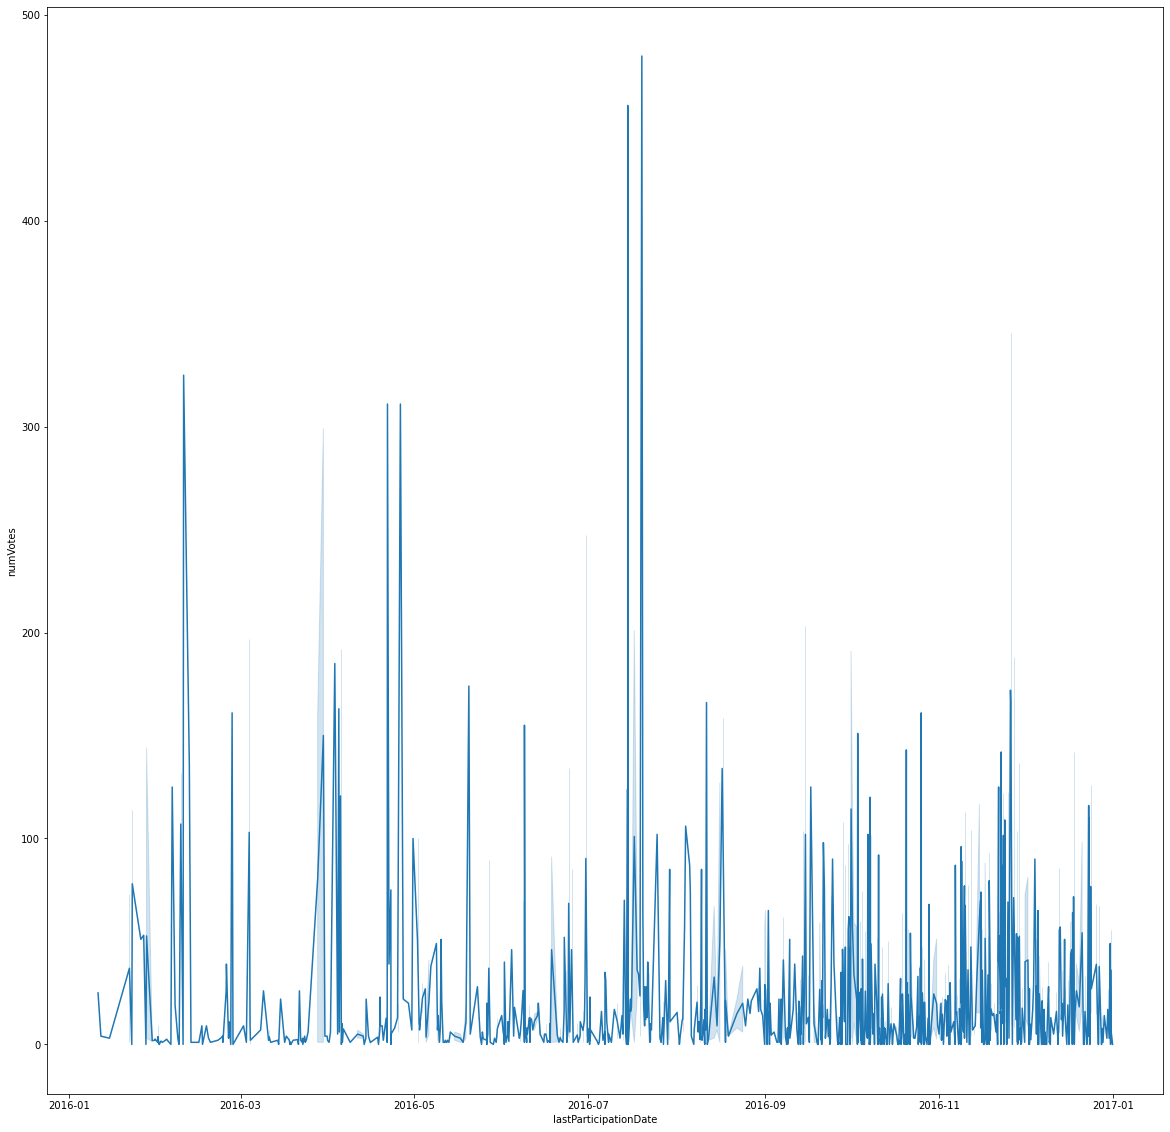

In [71]:
from matplotlib import pyplot
fig, ax = pyplot.subplots(figsize=(20,20))
sns.lineplot(data=churn_2016, x="lastParticipationDate", y="numVotes", estimator="mean")

In [27]:
employee_still_exists = churn[(churn.stillExists == False) & (churn.employee > 0)]
employee_still_exists

,employee,companyAlias,numVotes,lastParticipationDate,stillExists
3,487,56aec740f1ef260003e307d6,14,Sat Nov 19 15:02:14 CET 2016,False
8,475,56aec740f1ef260003e307d6,15,Sun Nov 06 19:38:30 CET 2016,False
14,14,56aec740f1ef260003e307d6,9,Fri Mar 04 08:19:57 CET 2016,False
24,14,56aec740f1ef260003e307d6,9,Fri Mar 04 01:00:00 CET 2016,False
33,22,56aec740f1ef260003e307d6,67,Sun Aug 14 02:00:00 CEST 2016,False
...,...,...,...,...,...
4684,454,58a728a0e75bda00042a3468,1,Thu Feb 23 01:00:00 CET 2017,False
4710,510,58a728a0e75bda00042a3468,7,Thu Mar 02 01:00:00 CET 2017,False
4715,519,58a728a0e75bda00042a3468,2,Thu Mar 02 01:00:00 CET 2017,False
4722,541,58a728a0e75bda00042a3468,7,Fri Mar 03 01:00:00 CET 2017,False


In [28]:
employee_still_exists.numVotes.mean()

40.98523489932886

In [29]:
employee_doesnot_exists = churn[(churn.stillExists == True) & (churn.employee > 0)]
employee_doesnot_exists

,employee,companyAlias,numVotes,lastParticipationDate,stillExists
0,512,56aec740f1ef260003e307d6,4,Thu Feb 23 12:48:04 CET 2017,True
2,2,56aec740f1ef260003e307d6,72,Fri Mar 17 01:00:00 CET 2017,True
4,3,56aec740f1ef260003e307d6,22,Thu Feb 16 01:00:00 CET 2017,True
6,4,56aec740f1ef260003e307d6,195,Mon Mar 20 01:00:00 CET 2017,True
7,516,56aec740f1ef260003e307d6,29,Mon Mar 20 12:28:45 CET 2017,True
...,...,...,...,...,...
4842,857,58a728a0e75bda00042a3468,1,Fri Mar 17 15:43:58 CET 2017,True
4843,858,58a728a0e75bda00042a3468,1,Fri Mar 17 17:00:00 CET 2017,True
4844,859,58a728a0e75bda00042a3468,1,Fri Mar 17 17:01:54 CET 2017,True
4845,17,573a0671b5ec330003add34a,7,Tue Jun 28 02:00:00 CEST 2016,True


In [30]:
employee_doesnot_exists.numVotes.mean()

52.253199019874764

<AxesSubplot:>

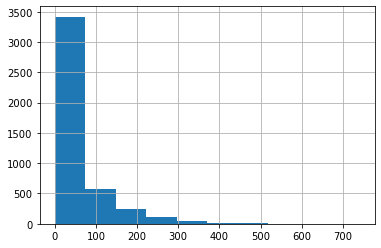

In [19]:
churn[churn.employee > 0].numVotes.hist()

In [34]:
from sklearn import preprocessing

x = churn[['employee','numVotes']].values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)

In [36]:
df['stillExists'] = churn.stillExists

In [38]:
df['companyAlias'] = churn.companyAlias

In [43]:
df.columns = ['employee','numVotes','stillExists','companyAlias']

<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


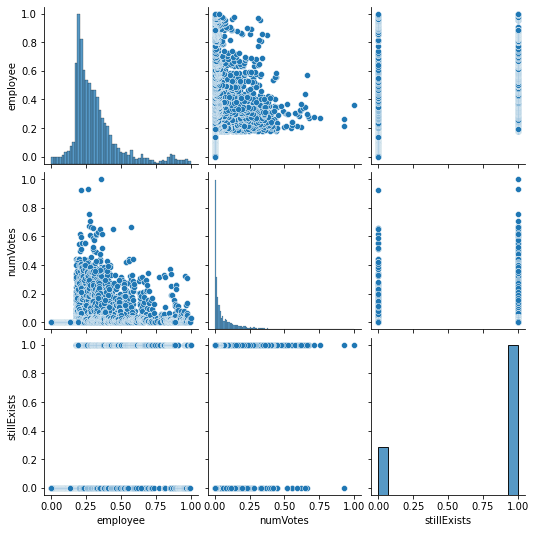

In [47]:

sns.pairplot(df)

In [44]:
df.groupby('companyAlias').mean()

,employee,numVotes,stillExists
companyAlias,,,
5370af43e4b0cff95558c12a,0.241450,0.025483,0.151786
53a2dd43e4b01cc02f1e9011,0.263435,0.042162,0.880000
5474b9cde4b0bf7614b2c66f,0.185785,0.006216,1.000000
54d43612e4b0f6a40755d93e,0.187906,0.027334,0.636364
54e52607e4b01191dc064966,0.410186,0.087793,0.376426
552e2d00e4b066b42fd122ed,0.196328,0.016356,0.862069
5641f96713664c000332c8cd,0.324741,0.138924,0.825893
56558cfd07a5de00030908fb,0.185223,0.003153,1.000000
567011c035dce00003a07fa4,0.278500,0.028802,0.911243


In [24]:
churn[churn.employee < 0].numVotes.value_counts()

0    429
Name: numVotes, dtype: int64

In [21]:
churn[churn.employee < 0]

,employee,companyAlias,numVotes,lastParticipationDate,stillExists
1,-2,56aec740f1ef260003e307d6,0,Wed Jan 18 14:00:55 CET 2017,False
5,-4,56aec740f1ef260003e307d6,0,Mon Nov 07 17:41:56 CET 2016,False
11,-6,56aec740f1ef260003e307d6,0,Tue Oct 25 17:17:21 CEST 2016,False
359,-3,54d43612e4b0f6a40755d93e,0,Thu May 26 09:57:28 CEST 2016,False
379,-3,5370af43e4b0cff95558c12a,0,Mon Jan 23 18:11:02 CET 2017,False
...,...,...,...,...,...
4493,-49,58a728a0e75bda00042a3468,0,Thu Feb 23 11:25:32 CET 2017,False
4494,-50,58a728a0e75bda00042a3468,0,Thu Feb 23 10:32:58 CET 2017,False
4496,-51,58a728a0e75bda00042a3468,0,Wed Feb 22 14:20:27 CET 2017,False
4498,-52,58a728a0e75bda00042a3468,0,Wed Feb 22 13:54:47 CET 2017,False


In [22]:
churn[churn.employee > 0]

,employee,companyAlias,numVotes,lastParticipationDate,stillExists
0,512,56aec740f1ef260003e307d6,4,Thu Feb 23 12:48:04 CET 2017,True
2,2,56aec740f1ef260003e307d6,72,Fri Mar 17 01:00:00 CET 2017,True
3,487,56aec740f1ef260003e307d6,14,Sat Nov 19 15:02:14 CET 2016,False
4,3,56aec740f1ef260003e307d6,22,Thu Feb 16 01:00:00 CET 2017,True
6,4,56aec740f1ef260003e307d6,195,Mon Mar 20 01:00:00 CET 2017,True
...,...,...,...,...,...
4842,857,58a728a0e75bda00042a3468,1,Fri Mar 17 15:43:58 CET 2017,True
4843,858,58a728a0e75bda00042a3468,1,Fri Mar 17 17:00:00 CET 2017,True
4844,859,58a728a0e75bda00042a3468,1,Fri Mar 17 17:01:54 CET 2017,True
4845,17,573a0671b5ec330003add34a,7,Tue Jun 28 02:00:00 CEST 2016,True


In [4]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4847 entries, 0 to 4846
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   employee               4847 non-null   int64 
 1   companyAlias           4847 non-null   object
 2   numVotes               4847 non-null   int64 
 3   lastParticipationDate  4847 non-null   object
 4   stillExists            4847 non-null   bool  
dtypes: bool(1), int64(2), object(2)
memory usage: 156.3+ KB


In [5]:
churn.describe()

,employee,numVotes
count,4847.000000,4847.000000
mean,167.375490,45.896431
std,208.271041,71.302128
min,-218.000000,0.000000
25%,33.000000,3.000000
50%,113.000000,16.000000
75%,231.000000,59.000000
max,999.000000,740.000000


# 1.3 Employee Interactions

## The file commentInteractions.csv contains information about which employee liked or disliked a given comment.

    employee: An integer id that identifies an amployee inside a company.
    companyAlias: A hash id for a given company that uses the app. An employee can be uniquely identified with the tuple (employee,companyAlias).

    commentId: A unique id for a given comment that allows us to relate it with the comments in anon_comments.csv.

    liked: A boolean that is True if the employee liked the comment.
    disliked: A boolean that is True if the employee disliked the comment.



In [6]:
commentInteractions

,employee,companyAlias,liked,disliked,commentId
0,307,56aec740f1ef260003e307d6,True,False,58d018d7e010990004e38070
1,36,56aec740f1ef260003e307d6,True,False,58d018d7e010990004e38070
2,276,56aec740f1ef260003e307d6,True,False,58d018d7e010990004e38070
3,24,56aec740f1ef260003e307d6,True,False,58d018d7e010990004e38070
4,382,56aec740f1ef260003e307d6,True,False,58d0179ae010990004e3806d
...,...,...,...,...,...
336955,-49,58a728a0e75bda00042a3468,True,False,58ad8adeb8242400048bf834
336956,232,58a728a0e75bda00042a3468,True,False,58ad8adeb8242400048bf834
336957,-25,58a728a0e75bda00042a3468,True,False,58ad8adeb8242400048bf834
336958,36,58a728a0e75bda00042a3468,True,False,58ad8adeb8242400048bf834


In [7]:
commentInteractions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336960 entries, 0 to 336959
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   employee      336960 non-null  int64 
 1   companyAlias  336960 non-null  object
 2   liked         336959 non-null  object
 3   disliked      336959 non-null  object
 4   commentId     336959 non-null  object
dtypes: int64(1), object(4)
memory usage: 12.9+ MB


In [8]:
commentInteractions.describe()

,employee
count,336960.000000
mean,162.879475
std,182.069656
min,-218.000000
25%,38.000000
50%,122.000000
75%,212.000000
max,999.000000


# 1.2 Happyness votes data

## The data regarding the votes of the app users is stored in votes.csv. This file containg 4 different columns:

    employee: An integer id that identifies an amployee inside a company.
    companyAlias: A hash id for a given company that uses the app. An employee can be uniquely identified with the tuple (employee,companyAlias).
    voteDate: String representing the date a given vote was emited.
    vote: The numeric value of the vote emited ranging from 1 to 4.



In [9]:
votes

,employee,companyAlias,voteDate,vote
0,31,56aec740f1ef260003e307d6,Mon Feb 01 01:00:00 CET 2016,4
1,33,56aec740f1ef260003e307d6,Mon Feb 01 01:00:00 CET 2016,4
2,79,56aec740f1ef260003e307d6,Mon Feb 01 01:00:00 CET 2016,4
3,94,56aec740f1ef260003e307d6,Mon Feb 01 01:00:00 CET 2016,4
4,16,56aec740f1ef260003e307d6,Mon Feb 01 01:00:00 CET 2016,2
...,...,...,...,...
221227,17,573a0671b5ec330003add34a,Fri Jun 03 02:00:00 CEST 2016,3
221228,17,573a0671b5ec330003add34a,Tue Jun 07 02:00:00 CEST 2016,4
221229,17,573a0671b5ec330003add34a,Mon Jun 13 02:00:00 CEST 2016,4
221230,17,573a0671b5ec330003add34a,Tue Jun 28 02:00:00 CEST 2016,4


In [10]:
votes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221232 entries, 0 to 221231
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   employee      221232 non-null  int64 
 1   companyAlias  221232 non-null  object
 2   voteDate      221232 non-null  object
 3   vote          221232 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 6.8+ MB


In [11]:
votes.describe()

,employee,vote
count,221232.000000,221232.000000
mean,172.119562,2.861530
std,172.723491,0.986078
min,1.000000,1.000000
25%,50.000000,2.000000
50%,127.000000,3.000000
75%,222.000000,4.000000
max,999.000000,4.000000


# 1.3 Comments data

## It is possible to find data about the comments written in the app in the anon_comments.csv file, and it has the following structure:

    employee: An integer id that identifies an amployee inside a company.
    companyAlias: A hash id for a given company that uses the app. An employee can be uniquely identified with the tuple (employee,companyAlias).
    commentDate: String representing the date a given comment was written.
    commentId: A unique id for a given comment.
    comment: Anonimized comment. It has the same length as the original comment.
    likes: Number of likes that the comment received.
    dislikes: Number of dislikes that the comment received.



In [12]:
comments_clean_anonimized

,employee,companyAlias,commentId,txt,likes,dislikes,commentDate
0,307,56aec740f1ef260003e307d6,58d018d7e010990004e38070,**********************************************...,4.0,0.0,Mon Mar 20 19:00:17 CET 2017
1,382,56aec740f1ef260003e307d6,58d0179ae010990004e3806d,*****************************,1.0,2.0,Mon Mar 20 18:55:16 CET 2017
2,172,56aec740f1ef260003e307d6,58cff8cde010990004e37f6a,***************************,3.0,0.0,Mon Mar 20 16:44:02 CET 2017
3,135,56aec740f1ef260003e307d6,58cfefeee010990004e37f60,***************************,1.0,1.0,Mon Mar 20 16:06:08 CET 2017
4,225,56aec740f1ef260003e307d6,58cfd9b4e010990004e37f52,*********************************,3.0,2.0,Mon Mar 20 14:30:50 CET 2017
...,...,...,...,...,...,...,...
82751,118,58a728a0e75bda00042a3468,58ae85a69fd38f00045eeee4,**********************************************...,1.0,0.0,Thu Feb 23 07:44:48 CET 2017
82752,-10,58a728a0e75bda00042a3468,58ae7fa19fd38f00045eeee2,*****************,2.0,0.0,Thu Feb 23 07:22:12 CET 2017
82753,-8,58a728a0e75bda00042a3468,58adbfcbb8242400048bf8c1,**********************,5.0,0.0,Wed Feb 22 17:43:39 CET 2017
82754,64,58a728a0e75bda00042a3468,58adba78b8242400048bf8b5,**********************************,3.0,0.0,Wed Feb 22 17:20:07 CET 2017


In [13]:
comments_clean_anonimized.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82756 entries, 0 to 82755
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   employee      82756 non-null  int64  
 1   companyAlias  82756 non-null  object 
 2   commentId     82756 non-null  object 
 3   txt           82539 non-null  object 
 4   likes         82755 non-null  float64
 5   dislikes      82755 non-null  float64
 6   commentDate   82755 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 4.4+ MB


In [14]:
comments_clean_anonimized.describe()

,employee,likes,dislikes
count,82756.000000,82755.000000,82755.000000
mean,135.108427,6.873107,1.270534
std,161.530227,7.704659,2.715937
min,-217.000000,0.000000,0.000000
25%,29.000000,2.000000,0.000000
50%,102.000000,4.000000,0.000000
75%,197.000000,9.000000,1.000000
max,999.000000,86.000000,53.000000


In [15]:
commentInteractions[(commentInteractions.disliked == True)]

,employee,companyAlias,liked,disliked,commentId
5,24,56aec740f1ef260003e307d6,False,True,58d0179ae010990004e3806d
6,217,56aec740f1ef260003e307d6,False,True,58d0179ae010990004e3806d
11,34,56aec740f1ef260003e307d6,False,True,58cfefeee010990004e37f60
15,169,56aec740f1ef260003e307d6,False,True,58cfd9b4e010990004e37f52
16,152,56aec740f1ef260003e307d6,False,True,58cfd9b4e010990004e37f52
...,...,...,...,...,...
336863,146,58a728a0e75bda00042a3468,False,True,58ad8ab3b8242400048bf833
336864,390,58a728a0e75bda00042a3468,False,True,58ad8ab3b8242400048bf833
336865,236,58a728a0e75bda00042a3468,False,True,58ad8ab3b8242400048bf833
336866,219,58a728a0e75bda00042a3468,False,True,58ad8ab3b8242400048bf833
